In [42]:
import numpy as np

import tensorflow as tf

from data_processing import *
import keras
import keras.backend as K

from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard, ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from model import ResNet50

def _main():
    image_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train_image/'
    labels_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train.csv'
    csv = pd.read_csv(labels_path)
    image_named = np.array(csv['image_id'])
    y = csv.loc[:, 'healthy':].values
    
    train ,val, y_train,y_val = train_test_split(image_named, y, test_size = 0.22, random_state = 42, shuffle = True)

    freeze = 1

    # step = 607
    num_train = 1420
    num_val = 401
    
    log_dir = 'log/imageNet/letter_image_Relu_only_Dense/'
    check_path(log_dir)
    weights_path = 'imageNet'

    model = ResNet50(weights = 'imageNet')
    
    
    # # temporary use Adam and
    adam = Adam(lr = 0.001)
    # logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, mode = 'min')
   
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr = 1e-6)


    # Freeze FC layers
    for i in range((len(model.layers)-freeze)):
        model.layers[i].trainable = False

    # model.compile(optimizer = adam, 
    #             loss = 'categorical_crossentropy',
    #             # loss = [categorical_focal_loss(alpha=.25, gamma=2)],
    #             metrics = ['accuracy'])
    model.compile(optimizer = adam, 
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

    batch_size  = 10
    
    history = model.fit_generator(train_generator(image_path, train, batch_size, y_train, num_train),
        epochs = 10, 
        steps_per_epoch = num_train//batch_size, 
        validation_data = val_generator(image_path, val, batch_size, y_val, num_val),
        validation_steps = num_val//batch_size,
        initial_epoch = 0,
        verbose = 1,
        callbacks=[checkpoint])
    model.save_weights(log_dir+'model.h5')
    import pickle
    with open('history', 'wb') as f:
        pickle.dump(history.history, f)


def check_path(path):
    os.makedirs(path) if not os.path.exists(path) else None

if __name__ == "__main__":
    h = _main()

Epoch 1/10
142/142 [==============================] - 29s 201ms/step - loss: 1.3713 - accuracy: 0.4225 - val_loss: 1.5475 - val_accuracy: 0.3325
Epoch 2/10
142/142 [==============================] - 27s 194ms/step - loss: 1.0832 - accuracy: 0.5712 - val_loss: 1.2794 - val_accuracy: 0.3375
Epoch 3/10
142/142 [==============================] - 31s 222ms/step - loss: 1.0283 - accuracy: 0.5884 - val_loss: 1.4235 - val_accuracy: 0.0925
Epoch 4/10
142/142 [==============================] - 32s 227ms/step - loss: 0.9819 - accuracy: 0.6135 - val_loss: 1.2046 - val_accuracy: 0.2750
Epoch 5/10
142/142 [==============================] - 31s 222ms/step - loss: 0.8892 - accuracy: 0.6448 - val_loss: 1.3675 - val_accuracy: 0.2325
Epoch 6/10
142/142 [==============================] - 32s 228ms/step - loss: 0.8963 - accuracy: 0.6635 - val_loss: 1.3041 - val_accuracy: 0.2775
Epoch 7/10
142/142 [==============================] - 32s 229ms/step - loss: 0.9957 - accuracy: 0.6307 - val_loss: 1.3622 - val_ac

In [23]:
import json
print(h.history)
print(type(h.history['accuracy'][0]))
# with open('history.json', 'w') as f:
#     json.dump(h.history,f)
import pickle
with open('history', 'wb') as f:
    pickle.dump(h.history, f)

{'val_loss': [2.093095541000366], 'val_accuracy': [0.2800000011920929], 'loss': [1.2988779242609587], 'accuracy': [0.45774648]}
<class 'numpy.float32'>


In [43]:

a = pickle.load(open('history','rb'))

In [1]:
from model import *
from PIL import Image

weight_path = r'C:\Users\ADMINS\Desktop\apple_k\resnet\model\collect_model\drop\swish\96.8_per.h5'
resnet = ResNet50(weights = weight_path, activate = 'swish', dropout_rate = 0.5)

def readAndProcess(image_path):
    path = image_path
    im = Image.open(path)
    im = im.resize((224,224), Image.BICUBIC)
    im = np.array(im)
    # im = np.array(letterbox_image(im, (224,224)))
    # im = np.reshape(im,[1]+list(im.shape))
    return im 

Using TensorFlow backend.
c:\users\admins\anaconda3\envs\ebox\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admins\anaconda3\envs\ebox\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admins\anaconda3\envs\ebox\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\admins\anaconda3\envs\ebox\lib\site-pa

In [13]:
np.round(a,2)

array([[0.02, 0.22, 0.01, 0.75]], dtype=float32)

In [7]:
b = np.array([0.1,0.2,0.4,0.9])
print(np.round(b,2))

[0.1 0.2 0.4 0.9]


In [61]:
import cv2
import numpy as np
import time

t1 = time.time()

image1 = r'C:/Users/emage/OneDrive/Desktop/cindy.png'
image2 =  r'C:\Users\emage\OneDrive\Desktop\duy.png'

image1 = r'C:\Users\emage\OneDrive\Desktop\imageHari\full_process-CY\milestone_04.png'
image2 = r'C:\Users\emage\OneDrive\Desktop\imageHari\full_process-v1\milestone_04.png'

image1 = cv2.imread(image1)
image2 = cv2.imread(image2)

image1 = np.copy(image1[:960,:1600,:])
image2 = np.copy(image2[:960,:1600,:])

# res1 = image1[:,:,:] - image2[:,:,:]

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)/180
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)/180

# print(image1[:,:,0])
# print(image2[:,:,0])

w,h = image1.shape[:2]

res2 = np.sum(np.abs(image1[:,:,0] - image2[:,:,0]))/(w*h)

# print(np.sum(res1))
print(res2)

# cv2.imshow('w1', image1)
# cv2.imshow('w2', image2)
# cv2.waitKey()
# cv2.destroyAllWindows()

print(time.time()-t1)

0.002445779079861111
0.10878753662109375


In [69]:
import cv2
import numpy as np
from keras.applications.resnet50 import preprocess_input
image_path =  r'C:\Users\ADMINS\Desktop/apple_k/data/train_image/3.jpg'
image = readAndProcess(image_path)
# image = image/255
# image = np.reshape(image_path, [1]+list(image.shape))
x = np.expand_dims(image, axis=0)
# x = preprocess_input(x)
# print(x.shape)
a = resnet.predict(x)
b = (list(np.round(a,2)))
print(b[0])
# for i in b:
#     print(i)
# print(list(a))
# cv2.imshow('w',image)
# cv2.waitKey()
# cv2.destroyAllWindows()


[0. 0. 1. 0.]


In [2]:
import pandas as pd
import cv2
import numpy as np
from model import *
from PIL import Image

# weight_path = r'C:\Users\ADMINS\Desktop\apple_k\resnet\model\collect_model\drop\swish\96.8_per.h5'
# weight_path = r'C:\Users\emage\OneDrive\Desktop\95_per.h5'
weight_path = r'C:\Users\emage\OneDrive\Desktop\collect_model\drop\swish\96.8_per.h5'
resnet = ResNet50(weights = weight_path, activate = 'swish', dropout_rate = 0.3)

def readAndProcess(image_path):
    path = image_path
    im = Image.open(path)
    im = im.resize((224,224), Image.BICUBIC)
    im = np.array(im)
    im = im/255
    # im = np.array(letterbox_image(im, (224,224)))
    # im = np.reshape(im,[1]+list(im.shape))
    return im 

image_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train_image/'
test_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train.csv'

csv = pd.read_csv(test_path)
y = csv.loc[:, 'healthy':].values
name = csv.image_id
# csv['healthy'] = csv['multiple_diseases'] = csv['rust'] = csv['scab'] = 0
# csv.reset_index()

final = []
for each in name:
#     num = int(each.split('_')[-1])
    num = each
#     print(num)
    path = image_path + str(each) +'.jpg'
    image = readAndProcess(path)
    image = np.expand_dims(image, axis=0)
    result = list(np.round(resnet.predict(image),2))[0]
    final.append(result)

final = np.round(np.array(final)).astype(np.int)

print(final.shape)
print(y.shape)
# csv.loc[0,1:]= np.array([1,2,3,4])
# print(csv.head())
# csv.to_csv (r'C:\Users\ADMINS\Desktop\result.csv', index = False, header=True)

# print((name[0]))


(1821, 4)
(1821, 4)


In [18]:
np.where(np.sum(np.abs(y-final), axis = 1)!= 0)

(array([ 292,  316,  379,  381,  551,  857,  905, 1027, 1085, 1173, 1270,
        1310, 1531, 1632, 1641, 1664, 1730, 1786], dtype=int64),)

In [41]:
temp = [ 292,  316,  379,  381,  551,  857,  905, 1027, 1085, 1173, 1270,
        1310, 1531, 1632, 1641, 1664, 1730, 1786]
table=  ['Healthy', 'Both', 'Rust', 'Scab']
for i in temp:
    true_label = table[np.argmax(y[i])]
    wrong_label = table[np.argmax(final[i])]
    img_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train_image/'+str(i)+'.jpg'
    image = cv2.imread(img_path)
#     print(image.shape)
    cv2.putText(image, 'True: ' +true_label, (60,70), cv2.FONT_HERSHEY_SIMPLEX, 3, (50,0,255), 3, cv2.LINE_AA)
    cv2.putText(image, 'Predict: ' +wrong_label, (60,200), cv2.FONT_HERSHEY_SIMPLEX, 3, (250,0,255), 3, cv2.LINE_AA)
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image', 900,500)
    cv2.imshow('image',image)
    cv2.waitKey()
#     break
cv2.destroyAllWindows()

In [17]:
np.sum(np.abs(y-final), axis = 1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
import sklearn.metrics as sk
a = np.round(sk.confusion_matrix(np.argmax(y,axis=1),np.argmax(final, axis=1)))
b = sk.accuracy_score(np.argmax(y,axis=1),np.argmax(final, axis=1))
print(a)
print(np.sum(a))
print(b)

[[514   0   1   1]
 [  4  83   0   4]
 [  1   0 621   0]
 [  7   0   0 585]]
1821
0.9901153212520593


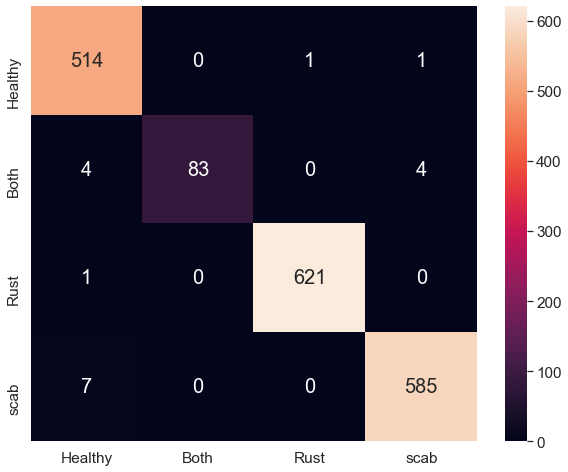

In [5]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(a, index = [i for i in ["Healthy", "Both", "Rust", "scab"]],
                  columns = [i for i in ["Healthy", "Both", "Rust", "scab"]])
# print(df_cm)
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt="d")
# plt.savefig('C:/Users/emage/OneDrive/Desktop/image.png')

In [44]:
from numba import cuda
cuda.close()


In [62]:
img_path = 'C:/Users/emage/OneDrive/Desktop/apple_k/data/train_image/1.jpg'
image = cv2.imread(img_path,0)
# img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(image,50,200)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)

cv2.resizeWindow('image', 900,500)
# cv2.imshow('image',image)s
cv2.imshow('image',edges)



cv2.waitKey()
cv2.destroyAllWindows()
# print(image.shape)

In [64]:
1820/1821

0.99945085118067